In [1]:
# importovanje biblioteka koje ce nam biti potrebne kasnije
import numpy as np
import pandas as pd 
import time
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
import shap

In [2]:
X_sm=pd.read_csv('D:\\Vlada\\Milica master\\X_sm_1.csv')
y_sm=pd.read_csv('D:\\Vlada\\Milica master\\y_sm_1.csv')
X_test=pd.read_csv('D:\\Vlada\\Milica master\\X_test_1.csv')
y_test=pd.read_csv('D:\\Vlada\\Milica master\\y_test_1.csv')

In [3]:
X_sm = pd.get_dummies(X_sm)
X_test = pd.get_dummies(X_test)
 
X_sm=X_sm.drop('NAME_CONTRACT_TYPE_Revolving loans',axis=1)
X_sm, X_test = X_sm.align(X_test, join='left', axis=1)

In [4]:
X_test.shape

(61503, 120)

In [5]:
X_sm.shape

(452296, 120)

In [6]:
X_test.replace(to_replace=np.nan,value=0,inplace=True)

In [7]:
X_test.head()

,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,...,client_installments_NUM_INSTALMENT_VERSION_mean_sum,client_installments_NUM_INSTALMENT_NUMBER_max_min,client_installments_DAYS_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_min_mean,client_installments_AMT_INSTALMENT_min_sum,client_installments_AMT_PAYMENT_mean_mean,client_installments_AMT_PAYMENT_min_min,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_PAYMENT_sum_mean,NAME_CONTRACT_TYPE_Cash loans
0,0.811107,0.424493,-0.774242,0.578409,-0.451414,0.599675,-0.933419,1.512952,-0.469093,0.418532,...,-0.598408,0.238794,0.661602,-0.174190,-0.576493,-0.370641,0.273481,-0.475769,-0.494062,1
1,-0.578749,-0.582140,-0.977863,-0.388159,-0.485614,0.095214,1.150423,-0.018845,-0.469093,0.551007,...,0.458210,-0.318961,-0.168681,-0.488798,-0.277635,-0.383185,-0.358687,-0.386623,-0.385585,1
2,-0.578749,-0.782018,-0.462197,-1.872736,-0.459112,-2.134007,0.344865,-2.469721,-0.469093,-2.536515,...,-0.327480,-0.226002,0.595444,-0.000898,-0.301388,-0.285619,0.092304,-0.354063,-0.319052,1
3,-0.578749,0.937050,-0.010501,1.462232,-0.453186,1.140737,0.467522,0.593873,-0.469093,-0.507098,...,-0.869336,-0.690798,0.707930,-0.728245,-0.745732,-0.724682,-0.359132,-0.699059,-0.775003,1
4,-0.578749,-0.685688,1.079452,-0.334066,-0.460352,-1.439450,1.295622,0.287514,2.131776,-0.834263,...,-0.598408,0.145835,0.639123,-0.323150,-0.374517,-0.253287,-0.351270,-0.681834,-0.209316,1


In [8]:
X_sm.shape

(452296, 120)

In [9]:
X_sm

,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,...,client_installments_NUM_INSTALMENT_VERSION_mean_sum,client_installments_NUM_INSTALMENT_NUMBER_max_min,client_installments_DAYS_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_min_mean,client_installments_AMT_INSTALMENT_min_sum,client_installments_AMT_PAYMENT_mean_mean,client_installments_AMT_PAYMENT_min_min,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_PAYMENT_sum_mean,NAME_CONTRACT_TYPE_Cash loans
0,2.200964,-0.923256,-0.912809,0.855291,-0.457375,-0.393927,-1.111106,-0.631564,-0.469093,-1.177591,...,0.187282,-0.133043,0.045330,-0.483105,-0.318920,-0.331602,-0.353634,-0.135934,-0.257027,1
1,-0.578749,-1.086618,-1.285861,0.150020,-0.451322,1.049094,0.663110,0.287514,2.131776,-0.000805,...,0.106004,-0.226002,0.595625,-0.116249,-0.241001,-0.328248,-0.080676,-0.033130,-0.503500,1
2,-0.578749,0.321581,-0.010501,-0.751224,-0.462337,-0.840225,0.100877,-2.163362,-0.469093,-0.144074,...,-0.760965,-0.318961,0.532352,0.099332,-0.644617,-0.196154,0.585786,-0.565650,-0.607243,1
3,-0.578749,-0.310771,-0.661770,-0.403745,-0.462372,1.122579,1.093404,-0.631564,-0.469093,0.844742,...,2.490168,-0.318961,-0.886280,-0.264981,0.414619,0.005393,-0.012409,0.831879,1.678107,1
4,-0.578749,-0.855766,-1.028534,1.729030,-0.457595,0.600526,1.420268,-2.163362,-0.469093,-1.884681,...,-0.544222,0.331753,0.606008,-0.530512,-0.679293,-0.587575,-0.133363,-0.611402,-0.655326,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452291,0.811107,-0.996243,-0.678768,1.717073,-0.458653,-0.323189,1.444828,0.580557,-0.469093,0.305091,...,-0.435851,0.699549,0.645196,-0.264203,-0.518941,-0.448972,-0.345132,-0.691152,-0.424951,1
452292,-0.578749,-0.677361,-0.689725,0.434436,-0.457738,1.152800,1.201913,-0.351046,2.131776,-1.184760,...,-0.160023,0.137994,0.141465,-0.609543,-0.543120,0.044269,-0.358969,-0.697029,0.855154,1
452293,-0.578749,-0.034243,-0.794064,-0.290114,-0.478538,0.267309,1.446959,0.593873,2.131776,-0.551176,...,0.430767,-0.142825,-1.335603,-0.549127,-0.174139,-0.381363,-0.356466,-0.336933,0.052522,1
452294,1.039149,-0.918804,-0.462197,0.839902,-0.482547,0.865107,-0.770084,-2.826347,1.705037,0.740486,...,0.224950,-0.271759,-0.074784,-0.021021,0.123252,-0.269202,-0.296100,-0.294964,-0.429781,1


## Logisticka regresija

In [10]:
#koristicemo funkciju SelectKBest da bismo izabrali najbolje varijable
bestfeatures = SelectKBest(score_func=f_classif, k=30)
fit = bestfeatures.fit(X_sm,y_sm)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_sm.columns)
dfcolumns= dfcolumns.loc[dfcolumns[0]!= 'NAME_CONTRACT_TYPE_Revolving loans']
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(30,'Score')) 

                                                 Specs         Score
9                                         EXT_SOURCE_2  43341.008288
10                                        EXT_SOURCE_3  36903.978608
3                                           DAYS_BIRTH  14649.051234
119                      NAME_CONTRACT_TYPE_Cash loans  14480.508440
117            client_installments_AMT_PAYMENT_min_sum   7817.972886
16                              bureau_DAYS_CREDIT_max   7712.605364
17                              bureau_DAYS_CREDIT_sum   6834.551747
15                              DAYS_LAST_PHONE_CHANGE   6426.660485
4                                        DAYS_EMPLOYED   5096.131310
11                                       FLOORSMAX_AVG   5007.660607
6                                      DAYS_ID_PUBLISH   4950.515067
26                       bureau_DAYS_CREDIT_UPDATE_min   4879.625154
22                        bureau_DAYS_ENDDATE_FACT_max   4574.135553
2                           REGION

In [11]:
#trazimo najbolji regularizacioni parametar 
grid_model = LogisticRegression()
params = {'C': [10**i for i in range(-5, 5)]}
grid = model_selection.GridSearchCV(grid_model, param_grid=params, scoring='roc_auc', cv=5, return_train_score=True)

In [12]:
grid.fit(X_sm, y_sm)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000]},
             return_train_score=True, scoring='roc_auc')

In [13]:
grid.fit(X_sm[featureScores.nlargest(30,'Score')['Specs']], y_sm)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000]},
             return_train_score=True, scoring='roc_auc')

In [14]:
grid.best_params_

{'C': 0.01}

In [15]:
log_reg = LogisticRegression(C = 0.01)

# Treniramo model na trening setu
log_reg.fit(X_sm, y_sm)

LogisticRegression(C=0.01)

In [16]:
log_reg = LogisticRegression()

# Treniramo model na trening setu
log_reg.fit(X_sm, y_sm)

LogisticRegression()

In [17]:
log_reg_pred = log_reg.predict_proba(X_test)
log_reg_pred

array([[0.61333016, 0.38666984],
       [0.60629333, 0.39370667],
       [0.39206798, 0.60793202],
       ...,
       [0.54177998, 0.45822002],
       [0.2983957 , 0.7016043 ],
       [0.57206245, 0.42793755]])

In [18]:
predicted = log_reg.predict(X_sm)
report = classification_report(y_sm, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.70      0.71    226148
           1       0.71      0.73      0.72    226148

    accuracy                           0.71    452296
   macro avg       0.71      0.71      0.71    452296
weighted avg       0.71      0.71      0.71    452296



In [19]:
predicted = log_reg.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     56538
           1       0.16      0.66      0.26      4965

    accuracy                           0.70     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.89      0.70      0.76     61503



In [20]:
confusion_matrix(y_test, predicted)

array([[39491, 17047],
       [ 1701,  3264]], dtype=int64)

In [21]:
logit_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

In [22]:
logit_roc_auc

0.7357174992359584

In [23]:
featureScores.nlargest(10,'Score')['Specs']

9                                 EXT_SOURCE_2
10                                EXT_SOURCE_3
3                                   DAYS_BIRTH
119              NAME_CONTRACT_TYPE_Cash loans
117    client_installments_AMT_PAYMENT_min_sum
16                      bureau_DAYS_CREDIT_max
17                      bureau_DAYS_CREDIT_sum
15                      DAYS_LAST_PHONE_CHANGE
4                                DAYS_EMPLOYED
11                               FLOORSMAX_AVG
Name: Specs, dtype: object

In [24]:
X_sm[featureScores.nlargest(10,'Score')['Specs']]

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,NAME_CONTRACT_TYPE_Cash loans,client_installments_AMT_PAYMENT_min_sum,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_sum,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,FLOORSMAX_AVG
0,-1.177591,0.613836,0.855291,1,-0.135934,-0.327253,-0.071709,1.164355,-0.457375,1.280985
1,-0.000805,0.112012,0.150020,1,-0.033130,0.796065,0.901063,0.548713,-0.451322,-0.280352
2,-0.144074,0.476446,-0.751224,1,-0.565650,0.773295,0.001924,-0.618466,-0.462337,1.671788
3,0.844742,-0.351504,-0.403745,1,0.831879,-2.560605,-0.094377,-1.274022,-0.462372,-1.451824
4,-1.884681,0.112012,1.729030,1,-0.611402,0.796065,0.901063,0.323744,-0.457595,-0.280352
...,...,...,...,...,...,...,...,...,...,...
452291,0.305091,-1.005377,1.717073,1,-0.691152,0.528630,0.877742,1.139278,-0.458653,-0.331271
452292,-1.184760,0.112012,0.434436,1,-0.697029,0.116332,0.841789,-0.412013,-0.457738,-0.280352
452293,-0.551176,0.533050,-0.290114,1,-0.336933,-1.511936,0.357686,-1.050041,-0.478538,-0.280352
452294,0.740486,1.392840,0.839902,1,-0.294964,-0.629161,-1.130186,1.089936,-0.482547,-0.280352


In [ ]:
import statsmodels.api as sm
log_reg_sm = sm.Logit(y_sm, X_sm[featureScores.nlargest(10,'Score')['Specs']]).fit()

In [ ]:
log_reg_sm.summary()

In [26]:
import sklearn
model = sklearn.linear_model.LogisticRegression(C = 0.01)
X_sm_new=X_sm[featureScores.nlargest(10,'Score')['Specs']]
model.fit( X_sm_new, y_sm)

LogisticRegression(C=0.01)

In [27]:
X_test_new=X_test[featureScores.nlargest(10,'Score')['Specs']]

In [28]:
explainer = shap.Explainer(model, X_sm_new, feature_names=X_sm_new.columns)
shap_values = explainer(X_test_new)

In [29]:
shap_values = explainer(X_test_new)

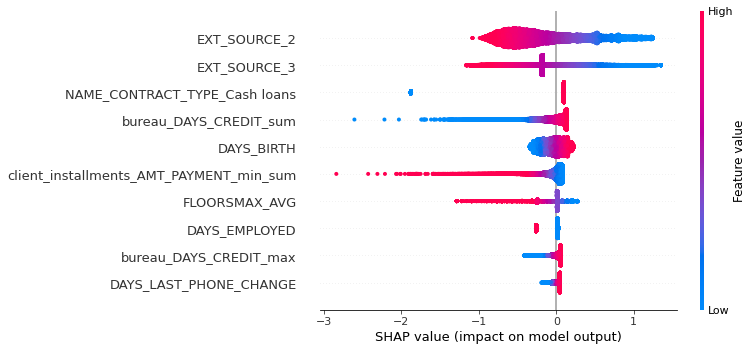

In [30]:
shap.plots.beeswarm(shap_values)

In [31]:
ind = 0
shap.plots.force(shap_values[ind])

## Slucajna suma

In [87]:
params = {'n_estimators': [100, 500, 1000], 
              'max_features': ['log2', 'sqrt'],
              'max_depth': [3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
              'min_samples_split': [2, 6, 10], 
              'min_samples_leaf': [1, 3, 4], 
              'max_samples':[0.6,0.8,1.0],
              'bootstrap': [True, False]} 


In [88]:
random_forest = RandomizedSearchCV(estimator = RandomForestClassifier(),param_distributions = params,
                               n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [89]:
random_forest.fit(X_sm, y_sm)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 56.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 191.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 5, 10, 20, 30, 40,
                                                      50, 60, 70, 80, 90, 100,
                                                      110, 120],
                                        'max_features': ['log2', 'sqrt'],
                                        'max_samples': [0.6, 0.8, 1.0],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [100, 500, 1000]},
                   random_state=42, verbose=2)

In [90]:
#print ('Random grid: ', random_forest, '\n')
# print the best parameters
print ('Best Parameters: ', random_forest.best_params_, ' \n')

Best Parameters:  {'n_estimators': 1000, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_samples': 0.8, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}  



In [91]:
random_forest = RandomForestClassifier(n_estimators = 1000, min_samples_split = 6, min_samples_leaf= 3,max_samples=0.8, max_features = 'sqrt', max_depth= 110, bootstrap=False) 
random_forest.fit( X_sm, y_sm) 

RandomForestClassifier(bootstrap=False, max_depth=110, max_features='sqrt',
                       max_samples=0.8, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=1000)

In [92]:
predictions = random_forest.predict_proba(X_test)[:, 1]

In [93]:
predicted_rf = random_forest.predict(X_test)

In [94]:
report_rf=classification_report(y_test,predicted_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56538
           1       0.27      0.03      0.06      4965

    accuracy                           0.91     61503
   macro avg       0.59      0.51      0.51     61503
weighted avg       0.87      0.91      0.88     61503



In [95]:
valid_auc_rf = roc_auc_score(y_test, predictions)

In [96]:
valid_auc_rf

0.7310910445779553

In [38]:
def plot_feature_importances(df):
    
    #sortiranje varijabli po znacaju
    df = df.sort_values('importance', ascending = False).reset_index()
    
    #Normalizujemo varijable da bi im suma bila 1
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    #bar chart
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    plt.xlabel('Normalizovan doprinos varijable'); plt.title('Znacajnost varijabli')
    plt.show()
    
    return df

In [39]:
features = list(X_sm.columns)
#izvlacimo najbitnije varijable
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

#predikcija na test setu
predictions = random_forest.predict_proba(X_test)[:, 1]

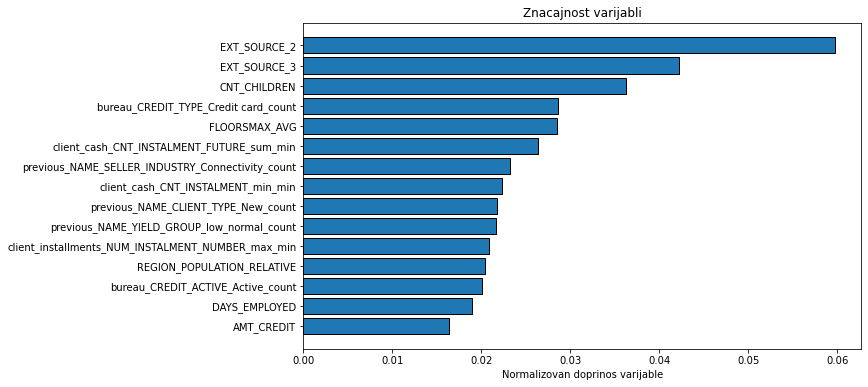

In [40]:
feature_importances_sorted = plot_feature_importances(feature_importances)

In [41]:
confusion_matrix(y_test, predicted_rf)

array([[56135,   403],
       [ 4795,   170]], dtype=int64)

## XGBoost

In [60]:
#Parametri za XGBoost
#Parametri za XGBoost
params = {
        'n_estimators' : [100, 500, 1000],
        'eta':[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
        'min_child_weight': [1, 2, 3, 5, 10, 20],
        'gamma': [0.1, 0.5, 1, 1.5, 2, 5, 3],
        'max_delta_step':[1, 3, 5, 10],
        'subsample': [ 0.6, 0.8, 1.0],
        'colsample_bytree': [ 0.6, 0.8, 1.0],
        'max_depth': [ 5, 6, 7],
        'eval_metric': ['auc'],
        'tree_method':['auto', 'exact'],
        'lambda':[0.01, 0.1, 1, 10]
        }

In [61]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Vreme utroseno %i sati %i minuta i %s sekundi.' % (thour, tmin, round(tsec, 2)))

In [62]:
folds = 3
param_comb = 30

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(estimator=XGBClassifier(objective='binary:logistic'), param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_sm,y_sm), verbose=3, random_state=1001 )

start_time = timer(None)
random_search.fit(X_sm, y_sm)
timer(start_time)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 148.2min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 394.7min finished



 Vreme utroseno 6 sati 39 minuta i 59.18 sekundi.


In [63]:
print('\n Rezultati:')
print(random_search.cv_results_)
print('\n Najbolji prediktor:')
print(random_search.best_estimator_)
print('\n Najbolji parametri:')
print(random_search.best_params_)


 Rezultati:
{'mean_fit_time': array([ 948.10551167, 3015.55231325, 1065.89582078,  333.53929806,
        193.98957769, 2122.7678868 , 1106.66917332, 2268.11325439,
       2277.58357469, 2129.15106932, 2139.72244501,  145.07409628,
        964.80655018, 1223.07755359, 1301.64926958,  203.11905829,
        205.92476082,  190.82499552,  228.28755951, 2563.0241243 ,
       1095.61961627,  157.59310357,  177.06612221,  150.54011822,
        242.56565611,  873.53030229,  951.82839203,  971.4566919 ,
        973.04400667,  961.67550492]), 'std_fit_time': array([  2.99610601,  29.73151896,  52.09552629,   1.32304662,
         2.65231519,   5.29538858,  83.56446467,  24.41510101,
        64.53169456, 231.25009582, 152.56395312,   6.26450676,
        22.68197531,  12.91773918,   1.98756139,   0.77721331,
         2.31733576,  20.54926841,   4.56302733,  11.98482407,
        63.8959754 ,   4.27195279,   2.70163649,   2.21071545,
         1.58949999,   9.97827944,  25.13610133,  45.71000635,
    

In [65]:
xgb_model =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eta=0.1,
              eval_metric='auc', gamma=2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=5, max_depth=6, min_child_weight=3,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='auto',
              validate_parameters=1, verbosity=None)
xgb_model.fit(X_sm, y_sm, eval_set=[(X_test, y_test)], eval_metric='auc', early_stopping_rounds=10)

[0]	validation_0-auc:0.59989
[1]	validation_0-auc:0.63751
[2]	validation_0-auc:0.66320
[3]	validation_0-auc:0.66445
[4]	validation_0-auc:0.66762
[5]	validation_0-auc:0.68138
[6]	validation_0-auc:0.68587
[7]	validation_0-auc:0.68963
[8]	validation_0-auc:0.69161
[9]	validation_0-auc:0.69242
[10]	validation_0-auc:0.69215
[11]	validation_0-auc:0.69324
[12]	validation_0-auc:0.69446
[13]	validation_0-auc:0.69584
[14]	validation_0-auc:0.69678
[15]	validation_0-auc:0.69785
[16]	validation_0-auc:0.69759
[17]	validation_0-auc:0.69806
[18]	validation_0-auc:0.69873
[19]	validation_0-auc:0.69918
[20]	validation_0-auc:0.70120
[21]	validation_0-auc:0.70227
[22]	validation_0-auc:0.70473
[23]	validation_0-auc:0.70382
[24]	validation_0-auc:0.70303
[25]	validation_0-auc:0.70405
[26]	validation_0-auc:0.70532
[27]	validation_0-auc:0.70671
[28]	validation_0-auc:0.70563
[29]	validation_0-auc:0.70558
[30]	validation_0-auc:0.70612
[31]	validation_0-auc:0.70578
[32]	validation_0-auc:0.70541
[33]	validation_0-au

[268]	validation_0-auc:0.74932
[269]	validation_0-auc:0.74930
[270]	validation_0-auc:0.74930
[271]	validation_0-auc:0.74933
[272]	validation_0-auc:0.74954
[273]	validation_0-auc:0.74959
[274]	validation_0-auc:0.74952
[275]	validation_0-auc:0.74954
[276]	validation_0-auc:0.74956
[277]	validation_0-auc:0.74953
[278]	validation_0-auc:0.74958
[279]	validation_0-auc:0.74964
[280]	validation_0-auc:0.74969
[281]	validation_0-auc:0.74982
[282]	validation_0-auc:0.74989
[283]	validation_0-auc:0.74989
[284]	validation_0-auc:0.74994
[285]	validation_0-auc:0.75003
[286]	validation_0-auc:0.75003
[287]	validation_0-auc:0.74993
[288]	validation_0-auc:0.74998
[289]	validation_0-auc:0.75000
[290]	validation_0-auc:0.75001
[291]	validation_0-auc:0.75009
[292]	validation_0-auc:0.75014
[293]	validation_0-auc:0.75015
[294]	validation_0-auc:0.75016
[295]	validation_0-auc:0.75025
[296]	validation_0-auc:0.75032
[297]	validation_0-auc:0.75045
[298]	validation_0-auc:0.75044
[299]	validation_0-auc:0.75040
[300]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eta=0.1,
              eval_metric='auc', gamma=2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=5, max_depth=6, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='auto',
              validate_parameters=1, verbosity=None)

In [66]:
predictions = xgb_model.predict_proba(X_test)[:, 1]

In [67]:
xgboost_roc_auc = roc_auc_score(y_test, predictions)

In [68]:
predicted_xgb = xgb_model.predict(X_test)

In [69]:
report_xgb=classification_report(y_test,predicted_xgb)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.49      0.05      0.08      4965

    accuracy                           0.92     61503
   macro avg       0.71      0.52      0.52     61503
weighted avg       0.89      0.92      0.89     61503



In [70]:
xgboost_roc_auc

0.7518063406596893

In [71]:
#izvlacimo najbitnije varijable
feature_importance_values = xgb_model.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

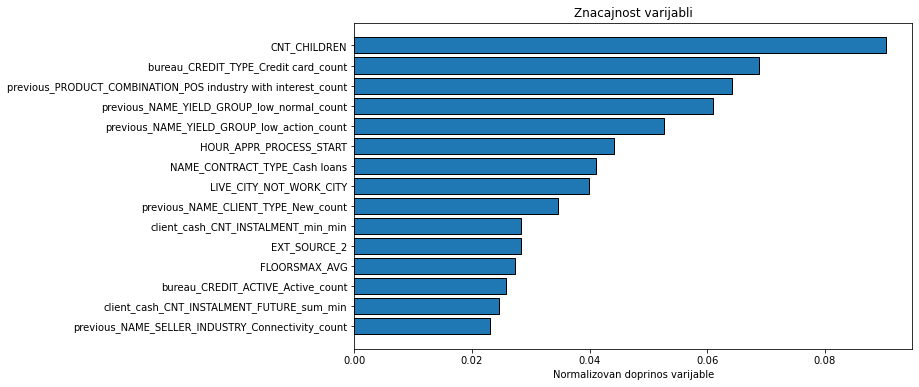

In [72]:
feature_importances_sorted = plot_feature_importances(feature_importances)

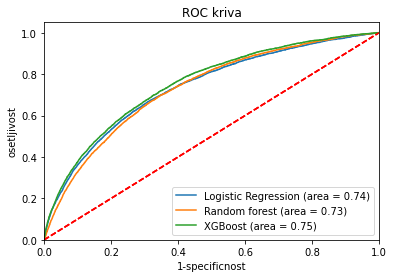

In [73]:
logit_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr_rf, tpr_rf, label='Random forest (area = %0.2f)' % valid_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (area = %0.2f)' % xgboost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-specificnost')
plt.ylabel('osetljivost')
plt.title('ROC kriva')
plt.legend(loc="lower right")
plt.show()


## Interpretabilnost

In [56]:
explainer = shap.TreeExplainer(xgb_model,X_sm,model_output='probability')
shap_values = explainer.shap_values(X_sm)

100%|===================| 451969/452296 [22:25<00:00]        

In [57]:
xgb_model.predict_proba(np.array(X_sm.iloc[1,:]).reshape((1,-1)))

array([[0.93688434, 0.06311568]], dtype=float32)

In [58]:
shap.initjs()

In [59]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sm.iloc[0,:])

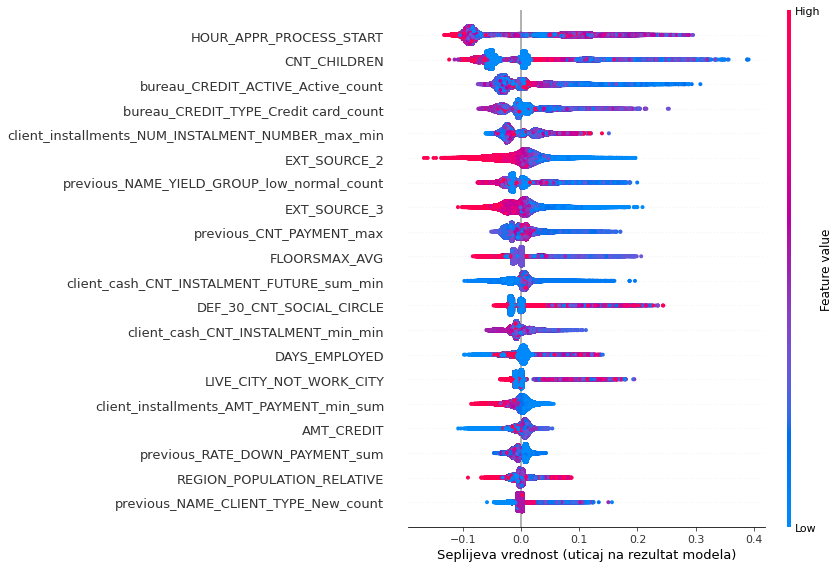

In [60]:
shap.summary_plot(shap_values, X_sm, show=False)
plt.xlabel("Seplijeva vrednost (uticaj na rezultat modela)")
plt.show()